In [ ]:
#Import Packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Print multiple statement in the same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [ ]:
##Import file
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Explore data
df.shape
type(df)
df.size
df.head()
df.tail()


(7043, 21)

pandas.core.frame.DataFrame

147903

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

Text(0.5, 0.98, 'Histograms of Numeric Variables')

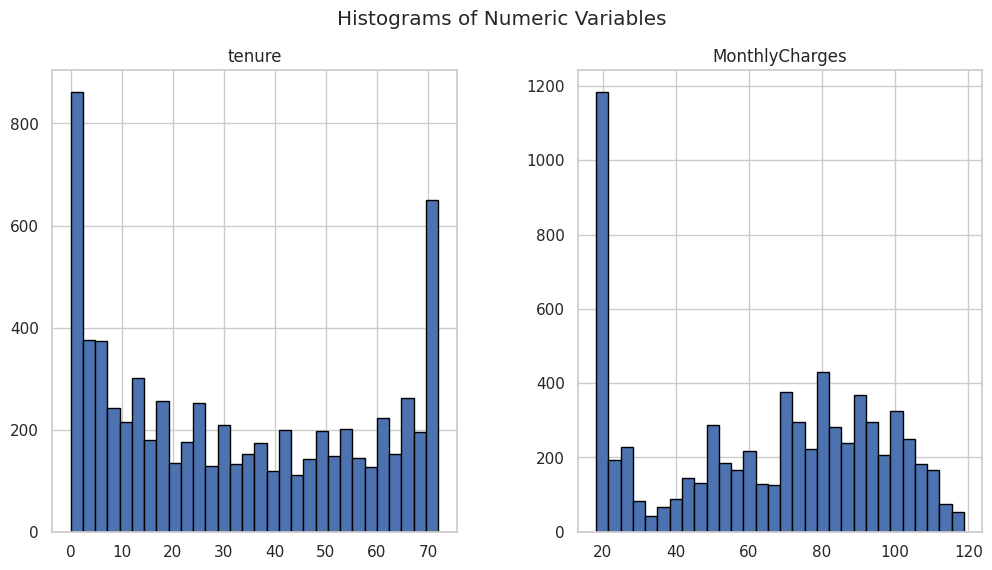

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='gender', ylabel='count'>

Text(0.5, 1.0, 'gender vs Churn')

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

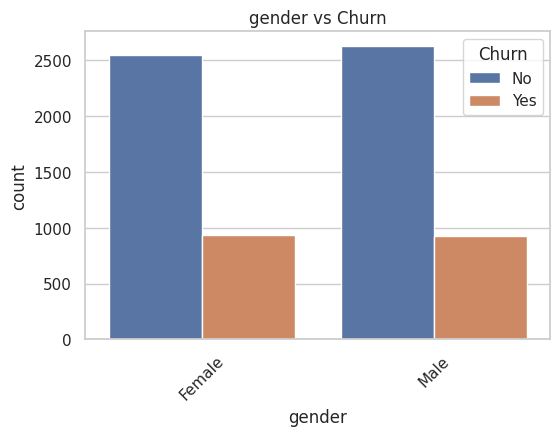

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='SeniorCitizen', ylabel='count'>

Text(0.5, 1.0, 'SeniorCitizen vs Churn')

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

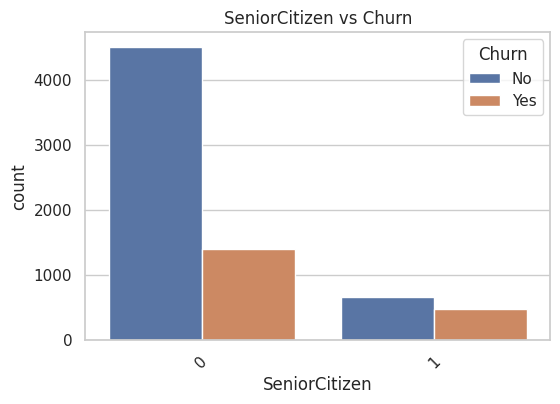

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Partner', ylabel='count'>

Text(0.5, 1.0, 'Partner vs Churn')

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

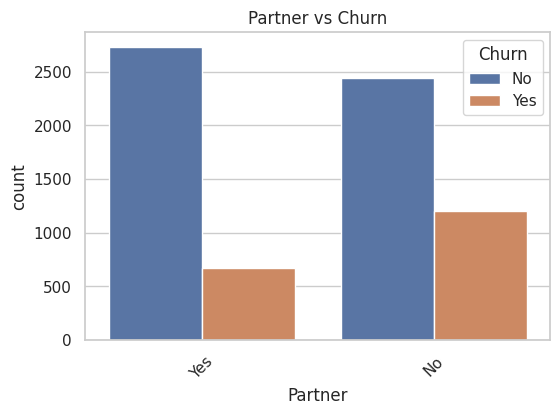

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Dependents', ylabel='count'>

Text(0.5, 1.0, 'Dependents vs Churn')

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

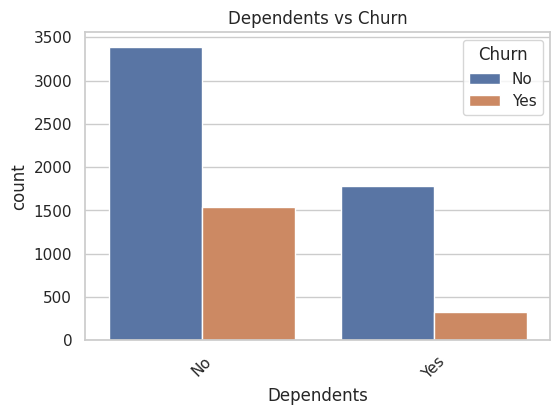

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='PhoneService', ylabel='count'>

Text(0.5, 1.0, 'PhoneService vs Churn')

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

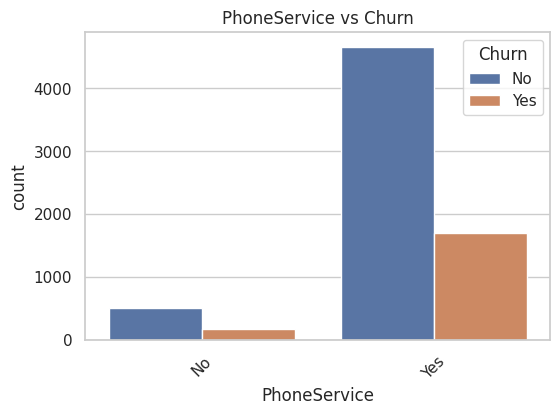

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='MultipleLines', ylabel='count'>

Text(0.5, 1.0, 'MultipleLines vs Churn')

([0, 1, 2],
 [Text(0, 0, 'No phone service'), Text(1, 0, 'No'), Text(2, 0, 'Yes')])

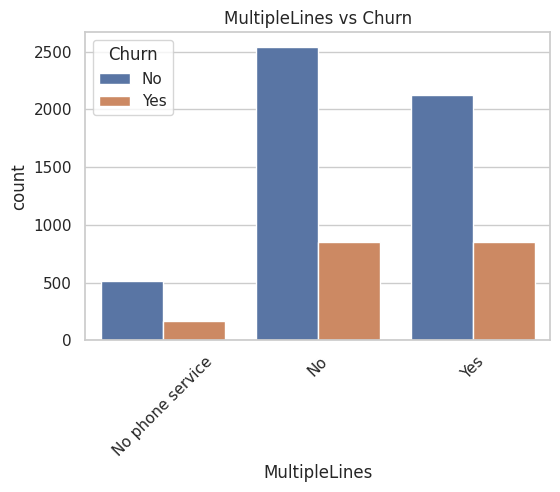

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='InternetService', ylabel='count'>

Text(0.5, 1.0, 'InternetService vs Churn')

([0, 1, 2], [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

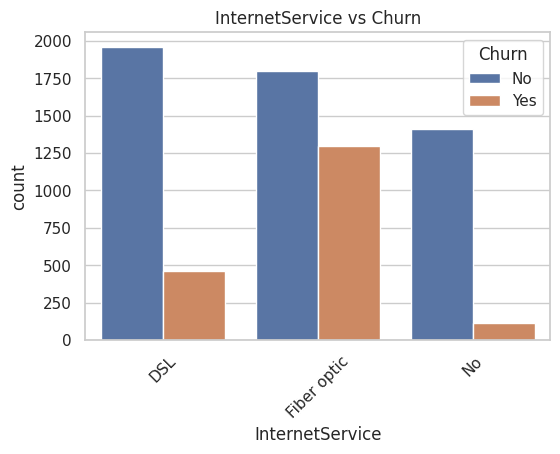

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Contract', ylabel='count'>

Text(0.5, 1.0, 'Contract vs Churn')

([0, 1, 2],
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

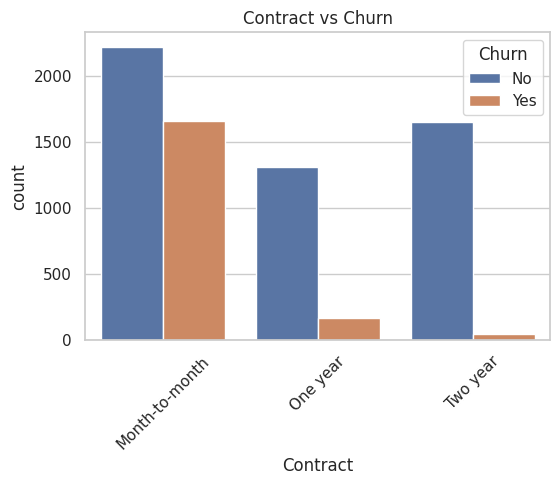

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='PaperlessBilling', ylabel='count'>

Text(0.5, 1.0, 'PaperlessBilling vs Churn')

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

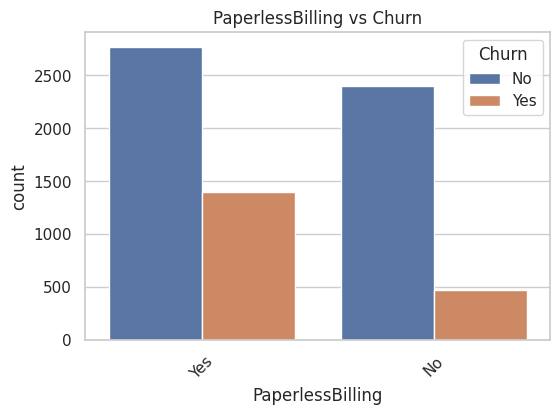

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='PaymentMethod', ylabel='count'>

Text(0.5, 1.0, 'PaymentMethod vs Churn')

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

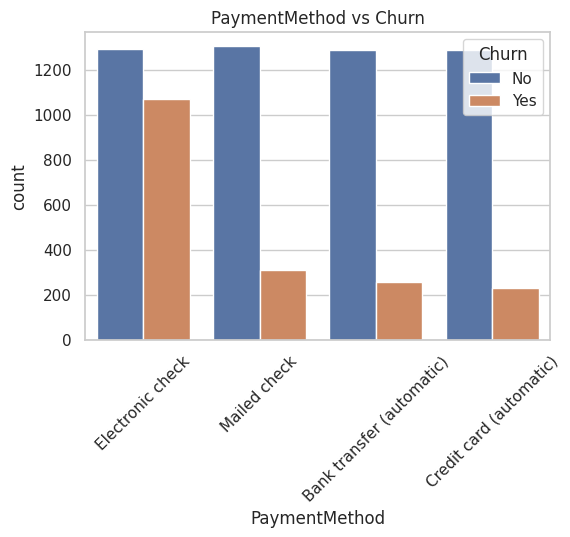

<Axes: xlabel='gender'>

Text(0.5, 1.0, 'Stacked Bar Chart of gender vs Churn (%)')

Text(0, 0.5, 'Percentage')

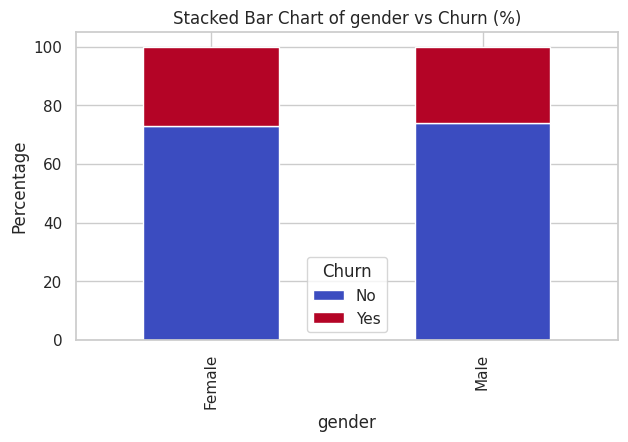

<Axes: xlabel='SeniorCitizen'>

Text(0.5, 1.0, 'Stacked Bar Chart of SeniorCitizen vs Churn (%)')

Text(0, 0.5, 'Percentage')

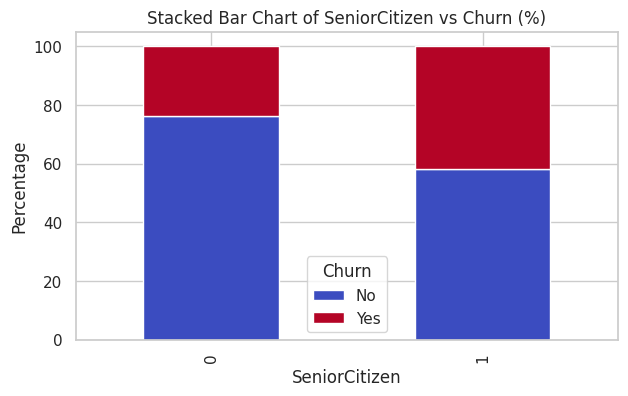

<Axes: xlabel='Partner'>

Text(0.5, 1.0, 'Stacked Bar Chart of Partner vs Churn (%)')

Text(0, 0.5, 'Percentage')

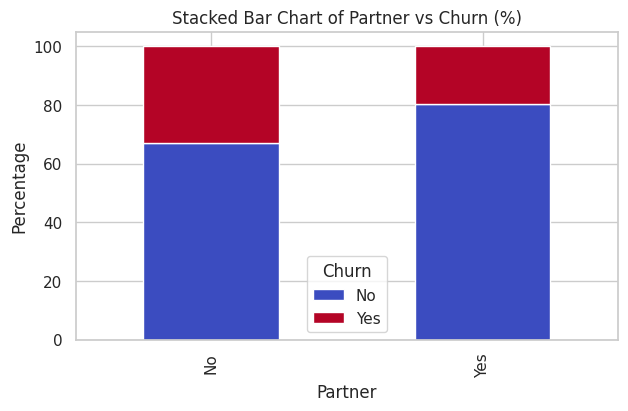

<Axes: xlabel='Dependents'>

Text(0.5, 1.0, 'Stacked Bar Chart of Dependents vs Churn (%)')

Text(0, 0.5, 'Percentage')

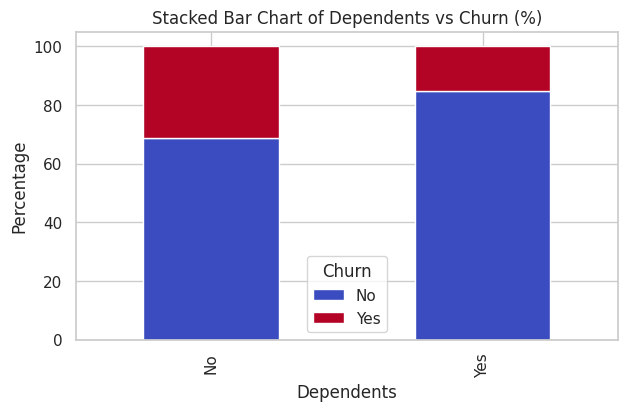

<Axes: xlabel='PhoneService'>

Text(0.5, 1.0, 'Stacked Bar Chart of PhoneService vs Churn (%)')

Text(0, 0.5, 'Percentage')

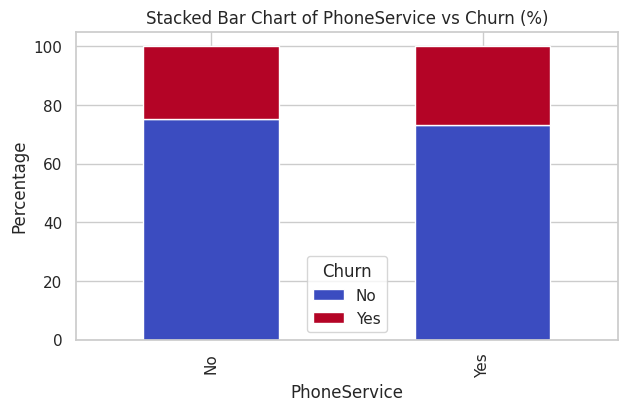

<Axes: xlabel='MultipleLines'>

Text(0.5, 1.0, 'Stacked Bar Chart of MultipleLines vs Churn (%)')

Text(0, 0.5, 'Percentage')

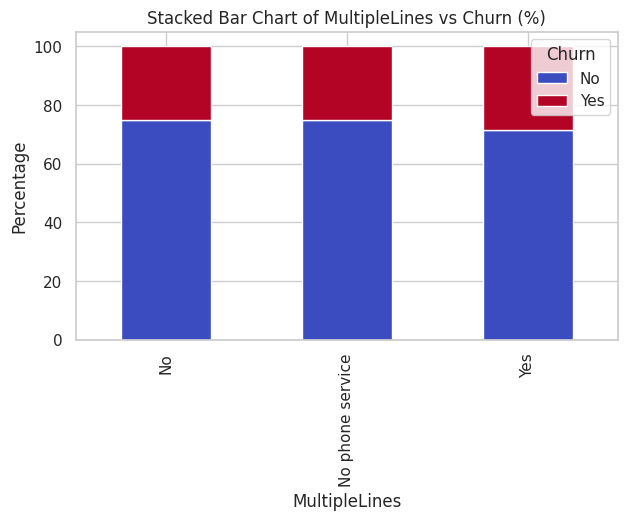

<Axes: xlabel='InternetService'>

Text(0.5, 1.0, 'Stacked Bar Chart of InternetService vs Churn (%)')

Text(0, 0.5, 'Percentage')

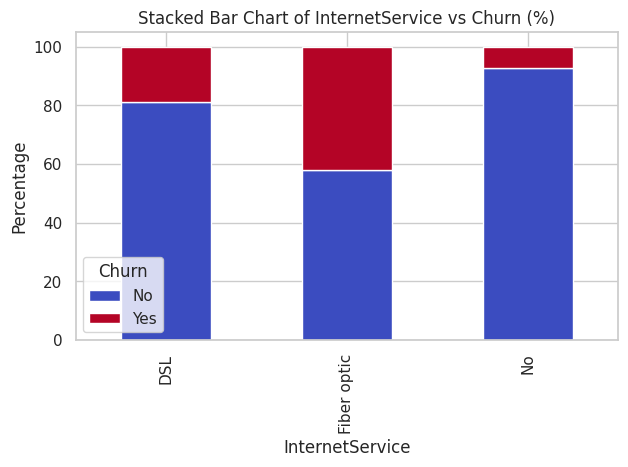

<Axes: xlabel='Contract'>

Text(0.5, 1.0, 'Stacked Bar Chart of Contract vs Churn (%)')

Text(0, 0.5, 'Percentage')

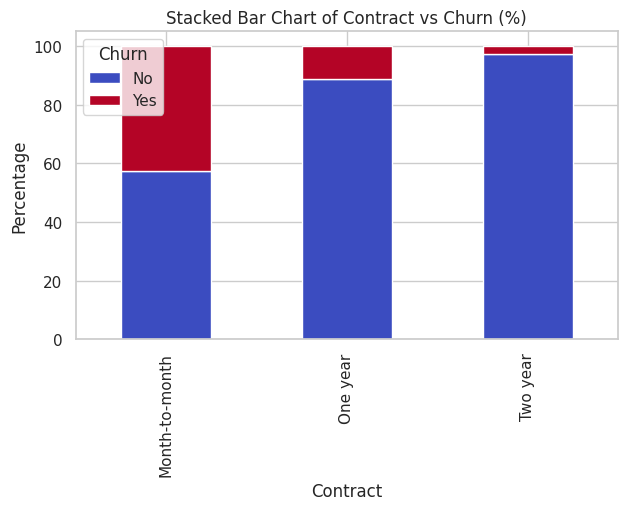

<Axes: xlabel='PaperlessBilling'>

Text(0.5, 1.0, 'Stacked Bar Chart of PaperlessBilling vs Churn (%)')

Text(0, 0.5, 'Percentage')

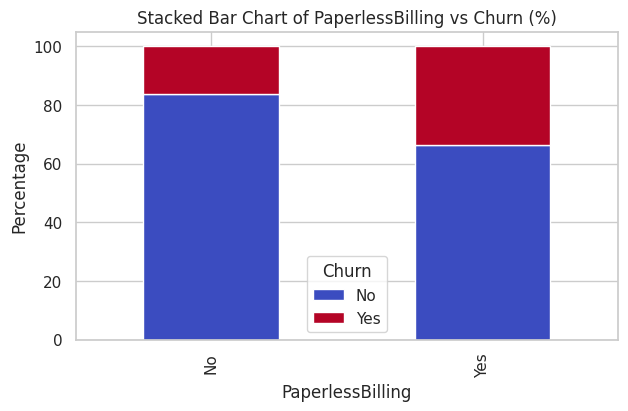

<Axes: xlabel='PaymentMethod'>

Text(0.5, 1.0, 'Stacked Bar Chart of PaymentMethod vs Churn (%)')

Text(0, 0.5, 'Percentage')

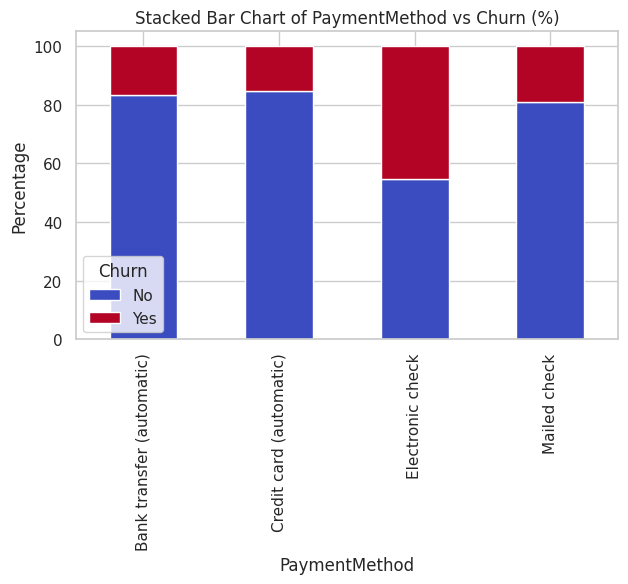

<Figure size 800x600 with 0 Axes>

ValueError: could not convert string to float: ' '

<Figure size 800x600 with 0 Axes>

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Basic EDA
print(df.info())
print(df.describe(include="all"))
print(df['Churn'].value_counts(normalize=True) * 100)

# 2. Histogram for numeric variables

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].hist(figsize=(12,6), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numeric Variables")
plt.show()

# 3. Bar plot for categorical variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

# 4. Stacked bar chart (Bivariate analysis: IV vs Churn)
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, figsize=(7,4), colormap="coolwarm")
    plt.title(f"Stacked Bar Chart of {col} vs Churn (%)")
    plt.ylabel("Percentage")
    plt.show()

# 5. Correlation heatmap for numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


In [ ]:
#Checking for missing values
pd.isnull(df).any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
#Checking for missing values
pd.isnull(df).any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
#Checking the count for missing values
pd.isnull(df).sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Find out variable type. Note that object means string or categorical in the below output
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Except the below variables all are categorical
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Missing value imputation
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
#Convert Total charges into numeric
df['TotalCharges']=pd.to_numeric(df.TotalCharges, errors='coerce')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#frequency of a categorical variable
print('count of Labels')
df.groupby("Churn").size()

count of Labels


,0
Churn,
No,5174
Yes,1869


In [ ]:
1869/(1869+5174)

0.2653698707936959

In [ ]:
#Convert churn from (yes,No) to (0,1)
le=preprocessing.LabelEncoder()
le.fit(df['Churn'])
list(le.classes_)

LabelEncoder()

['No', 'Yes']

In [ ]:
dfn=le.transform(df['Churn'])
le.inverse_transform([0,1])
df['y']=dfn
df.info()
df.columns


array(['No', 'Yes'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'y'],
      dtype='object')

In [ ]:
#Separate out independent categorical variables for conversion into numerical
x_catg=df.loc[:,('gender','Partner', 'Dependents','PhoneService', 'MultipleLines',
                 'InternetService',    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod')]


In [ ]:
#Display top 5 rows
x_catg.head()
#Display shape
x_catg.shape

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


(7043, 15)

In [ ]:
#Separate out independent numerical variables
x_num=df.loc[:,('SeniorCitizen','tenure','MonthlyCharges','TotalCharges')]
x_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [ ]:
# Convert categorical variables into dummy coding
x_num1=pd.get_dummies(x_catg)
x_num1.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,True,False,False,True,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,False,True,True,False,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,False,True,True,False,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,False,True,True,False,True,False,True,False,False,True,...,False,False,True,False,True,False,True,False,False,False
4,True,False,True,False,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
#get all x's together
x=pd.concat([x_num1,x_num],axis=1)
x.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,True,False,False,True,True,False,True,False,False,True,...,False,True,False,False,True,False,0,1,29.85,29.85
1,False,True,True,False,True,False,False,True,True,False,...,True,False,False,False,False,True,0,34,56.95,1889.50
2,False,True,True,False,True,False,False,True,True,False,...,False,True,False,False,False,True,0,2,53.85,108.15
3,False,True,True,False,True,False,True,False,False,True,...,True,False,True,False,False,False,0,45,42.30,1840.75
4,True,False,True,False,True,False,False,True,True,False,...,False,True,False,False,True,False,0,2,70.70,151.65


In [ ]:
x.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,True,False,False,True,True,False,True,False,False,True,...,False,True,False,False,True,False,0,1,29.85,29.85
1,False,True,True,False,True,False,False,True,True,False,...,True,False,False,False,False,True,0,34,56.95,1889.50
2,False,True,True,False,True,False,False,True,True,False,...,False,True,False,False,False,True,0,2,53.85,108.15
3,False,True,True,False,True,False,True,False,False,True,...,True,False,True,False,False,False,0,45,42.30,1840.75
4,True,False,True,False,True,False,False,True,True,False,...,False,True,False,False,True,False,0,2,70.70,151.65


In [ ]:
# Create dep variable
y=df['y']
y.head()

,y
0,0
1,0
2,1
3,0
4,1


In [ ]:
#create training and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(5282, 45)

(5282,)

(1761, 45)

(1761,)

In [ ]:
train_x.isnull().sum()

,0
gender_Female,0
gender_Male,0
Partner_No,0
Partner_Yes,0
Dependents_No,0
Dependents_Yes,0
PhoneService_No,0
PhoneService_Yes,0
MultipleLines_No,0
MultipleLines_No phone service,0


In [ ]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=50000)

In [ ]:
train_x.isnull().sum()

,0
gender_Female,0
gender_Male,0
Partner_No,0
Partner_Yes,0
Dependents_No,0
Dependents_Yes,0
PhoneService_No,0
PhoneService_Yes,0
MultipleLines_No,0
MultipleLines_No phone service,0


In [ ]:
#Fit a model
log.fit(train_x,train_y)


LogisticRegression(max_iter=50000)

In [ ]:
#
log.coef_


array([[-6.86376350e-02, -7.24247829e-02, -9.18214721e-02,
        -4.92409458e-02, -3.44683060e-02, -1.06594112e-01,
         7.45679630e-02, -2.15630381e-01, -2.33322881e-01,
         7.45679630e-02,  1.76925006e-02, -3.56653413e-01,
         3.31453333e-01, -1.15862337e-01,  1.96347724e-01,
        -1.15862337e-01, -2.21547804e-01,  8.24596348e-02,
        -1.15862337e-01, -1.07659715e-01,  4.35254103e-02,
        -1.15862337e-01, -6.87254909e-02,  1.72881312e-01,
        -1.15862337e-01, -1.98081393e-01, -8.80726784e-02,
        -1.15862337e-01,  6.28725978e-02, -1.20526062e-01,
        -1.15862337e-01,  9.53259818e-02,  5.88035859e-01,
        -3.42781493e-03, -7.25670462e-01, -2.28692725e-01,
         8.76303071e-02, -8.19865823e-02, -1.27603304e-01,
         2.02006009e-01, -1.33478541e-01,  2.19470338e-01,
        -6.19676384e-02,  2.53918344e-03,  3.30825883e-04]])

In [ ]:
#Find out the key predictor of churn
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values=("variable","ascending=True")

In [ ]:
#
coeff


,Variable,Coeff
0,gender_Female,-0.068638
1,gender_Male,-0.072425
2,Partner_No,-0.091821
3,Partner_Yes,-0.049241
4,Dependents_No,-0.034468
5,Dependents_Yes,-0.106594
6,PhoneService_No,0.074568
7,PhoneService_Yes,-0.215630
8,MultipleLines_No,-0.233323
9,MultipleLines_No phone service,0.074568


In [ ]:
#Generate Model Diagnostics
classes=log.predict(test_x)
classes

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print(classes.size)

1761


In [ ]:
print('Positive cases in Test data:', test_y[test_y == 1].shape[0])

Positive cases in Test data: 434


In [ ]:
print('Negative cases in Test data:', test_y[test_y == 0].shape[0])

Negative cases in Test data: 1327


In [ ]:
#Generate Model Diagnostics
classes=log.predict(test_x)
print(classes.size)
print('Positive cases in Test data:', test_y[test_y == 1].shape[0])
print('Negative cases in Test data:', test_y[test_y == 0].shape[0])
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(test_y,classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,classes))
print('AUC')
auc=metrics.roc_auc_score(test_y,classes)
auc


1761
Positive cases in Test data: 434
Negative cases in Test data: 1327
Accuracy Score
0.8120386144236229
Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1327
           1       0.63      0.57      0.60       434

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.81      0.81      0.81      1761

AUC


np.float64(0.7303044877916648)

Confusion Matrix


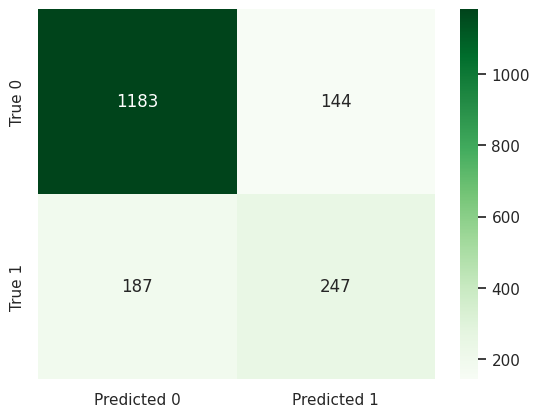

In [ ]:
print('Confusion Matrix')
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();


In [ ]:
(1189+241)/(1189+139+193+241)

0.811577752553916

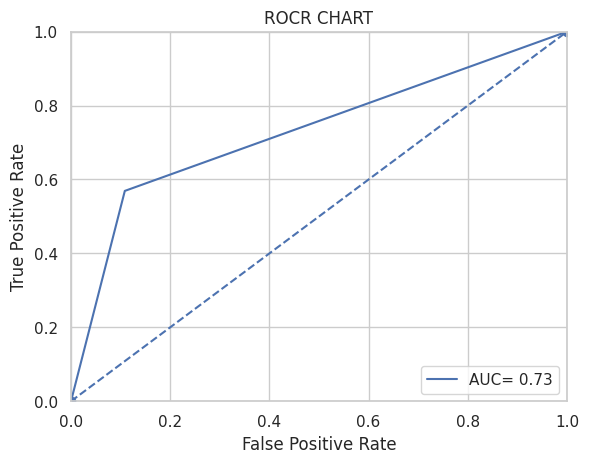

In [ ]:
#ROC Chart
fpr,tpr,th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();
#


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# 1. Decision Tree
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(train_x, train_y)

# 2. Support Vector Machine
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(train_x, train_y)

# 3. Neural Network (simple MLP)
nn = MLPClassifier(hidden_layer_sizes=(32,16), activation='relu',
                   solver='adam', max_iter=500, random_state=42)
nn.fit(train_x, train_y)

# 4. AdaBoost
ada = AdaBoostClassifier(n_estimators=3, random_state=42)
ada.fit(train_x, train_y)

# 5. Random Forest
rf = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=42)
rf.fit(train_x, train_y)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

models = {'Decision Tree': dtree,
          'SVM': svm,
          'Neural Net': nn,
          'AdaBoost': ada,
          'Random Forest': rf}

for name, model in models.items():
    preds = model.predict(test_x)
    print(f"--- {name} ---")
    print("Accuracy:", round(accuracy_score(test_y, preds)*100,2), "%")
    print(classification_report(test_y, preds))


**Model Comparison**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)  # maintain class proportion

# Optional: feature scaling for some models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42)
}

# Dictionary to store accuracy
accuracy_dict = {}

for name, model in models.items():
    # Logistic Regression and SVM benefit from scaling
    if name in ['Logistic Regression', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Accuracy comparison DataFrame
acc_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\nModel Accuracy Comparison:\n", acc_df)




Logistic Regression Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Decision Tree Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Random Forest Accuracy: 0.9000
              precision 